In [66]:
class Node:
    def __init__(self, value):
        self.value = value
        self.left = None
        self.right = None

def shannon_fano_encoding(symbol_probabilities):
    sorted_symbols = sorted(symbol_probabilities, key=lambda x: x[1])  # Sort in ascending order
    return construct_tree(sorted_symbols)

def find_split_index(symbols, total_probability):
    cumulative_probability = 0
    split_index = 0
    min_difference = total_probability
    for i, (_, prob) in enumerate(symbols):
        cumulative_probability += prob
        difference = abs(2 * cumulative_probability - total_probability)
        if difference < min_difference:
            min_difference = difference
            split_index = i
    return split_index

def construct_tree(symbols):
    if len(symbols) == 1:
        return Node(symbols[0][0])
    elif len(symbols) == 0:
        return None

    total_probability = sum(prob for _, prob in symbols)
    split_index = find_split_index(symbols, total_probability)

    node = Node(None)
    node.left = construct_tree(symbols[:split_index + 1])
    node.right = construct_tree(symbols[split_index + 1:])
    return node

def print_tree(node, code=''):
    if node is not None:
        print_tree(node.right, code + '1')
        if node.value is not None:
            print(f"{node.value}: {code}")
        print_tree(node.left, code + '0')


In [67]:
# Test case:
symbol_probabilities = [('A', 0.49), ('B', 0.14), ('C', 0.14), ('D', 0.07), ('E', 0.07), ('F', 0.04), ('G', 0.02), ('H', 0.02), ('I', 0.01)]
root = shannon_fano_encoding(symbol_probabilities)
print("Shannon-Fano Encoding Tree:")
print_tree(root)

Shannon-Fano Encoding Tree:
A: 1
C: 011
B: 010
E: 0011
D: 0010
F: 0001
H: 00001
G: 000001
I: 000000


In [68]:
import matplotlib.pyplot as plt

def plot_tree(node, x=0, y=0, spacing=30, code=''):
    if node is not None:
        if node.value is not None:
            plt.text(x, y - 1, f"{node.value}\n{code}", style='normal', fontsize=10, verticalalignment='top', horizontalalignment='center')  # Adjust vertical alignment
        if node.left is not None:
            plt.plot([x, x - spacing], [y - 2, y - spacing], marker='o', color='b')
            plot_tree(node.left, x - spacing, y - spacing, spacing * 0.8, code + '0')
        if node.right is not None:
            plt.plot([x, x + spacing], [y - 2, y - spacing], marker='o', color='r')
            plot_tree(node.right, x + spacing, y - spacing, spacing * 0.8, code + '1')



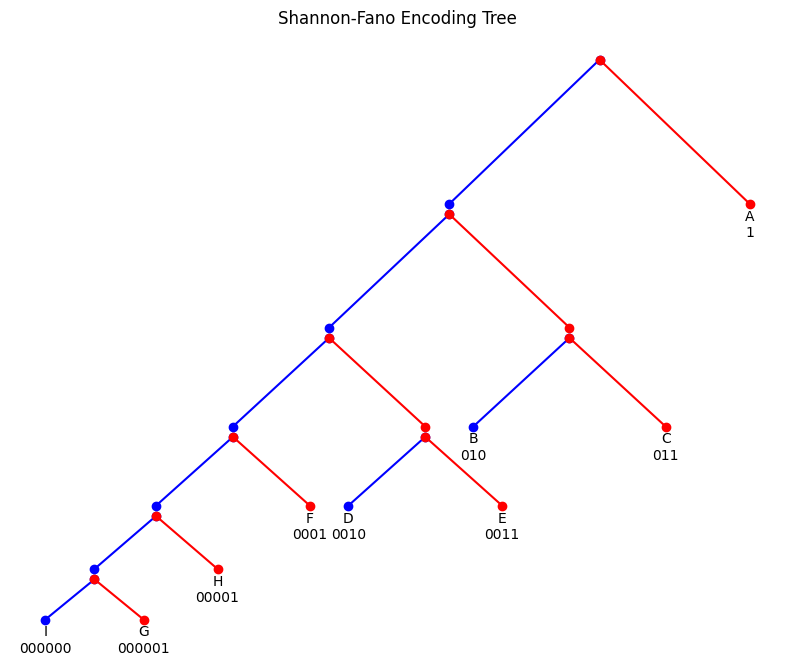

In [69]:
root = shannon_fano_encoding(symbol_probabilities)
plt.figure(figsize=(10, 8))
plot_tree(root)
plt.title("Shannon-Fano Encoding Tree")
plt.axis('off')
plt.show()

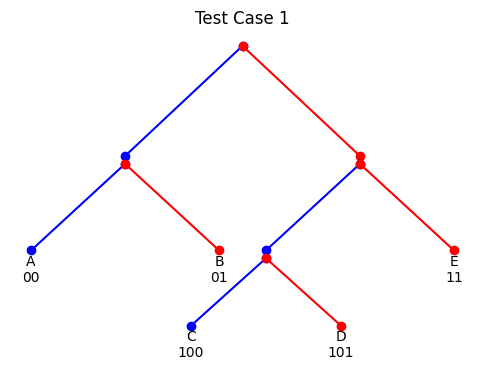

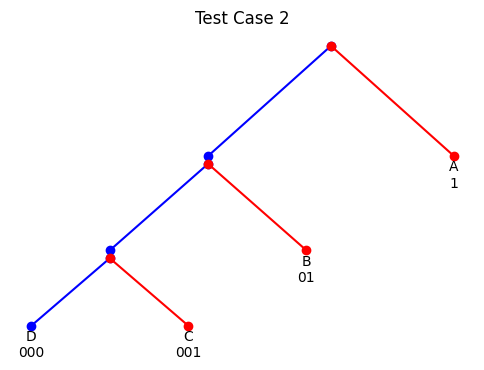

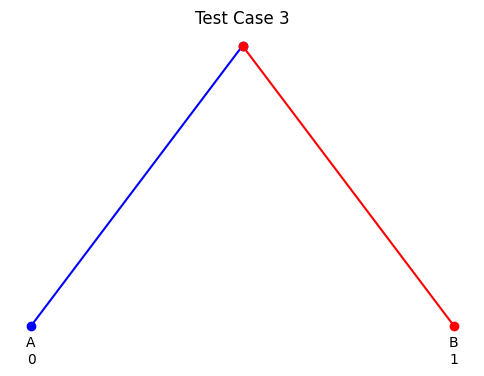

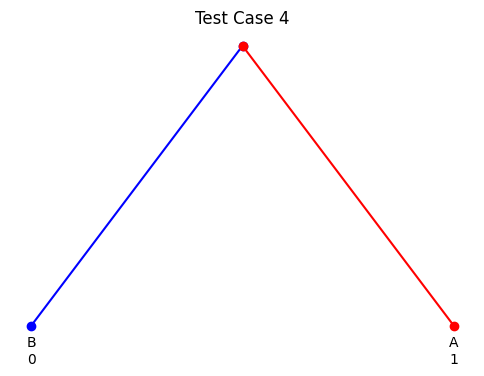

In [74]:
test_cases = [
    [('A', 0.2), ('B', 0.2), ('C', 0.2), ('D', 0.2), ('E', 0.2)],
    [('A', 0.4), ('B', 0.3), ('C', 0.2), ('D', 0.1)],
    [('A', 0.5), ('B', 0.5)],
    [('A', 0.7), ('B', 0.3)]
]

# Plotting
for idx, symbol_probabilities in enumerate(test_cases, start=1):
    plt.figure(figsize=(6, 4))
    root = shannon_fano_encoding(symbol_probabilities)
    plot_tree(root)
    plt.title(f"Test Case {idx}")
    plt.axis('off')
    plt.show()